<a href="https://colab.research.google.com/github/Nandilath/ML/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the modules

In [38]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet121

Load the MNIST dataset from Keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
len(x_train)

11490434/11490434 [==============================] - 0s 0us/step


60000

In [3]:
len(x_test)

10000

# Finding the shape of individual sample

In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

See the images

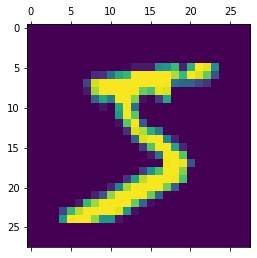

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[0]

5

# Show first 5 data

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Flatten the training data

we need to convert the two dimensional input data into a single dimensional format for feeding into the model. This is achieved by a process called flattening. In this process the 28x28 grid image is converted into a single dimensional array of 784(28x28).

In [9]:
x_train.shape

(60000, 28, 28)

# Scale the data so that the values are from 0 - 1

In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [13]:
x_train_flattened.shape

(60000, 784)

In [14]:
x_train_flattened.shape

(60000, 784)

PART 1 - Create a simple neural network in keras

In [15]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 11ms/step - loss: 0.4726 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3041 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2668 - accuracy: 0.9254


Evaluate the accuracy on test data

In [16]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.9262


[0.26447808742523193, 0.9261999726295471]

Sample prediction

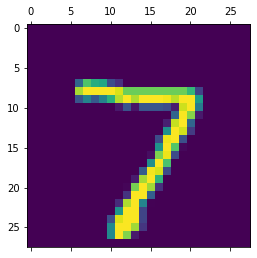

In [17]:
# Show the image
plt.matshow(x_test[0])

In [18]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.49131862e-02, 3.13065101e-07, 5.34007028e-02, 9.63952184e-01,
       2.31952150e-03, 1.20278224e-01, 2.18471223e-06, 9.99885440e-01,
       1.09551385e-01, 6.72071815e-01], dtype=float32)

In [19]:
# Find the maximum value using numpy
np.argmax(y_predicted[0])

7

In [20]:
# converting y_predicted from whole numbers to integers 
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Using confusion matrix for validation

In [21]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    6,    6,    2,    2,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    8,  924,   16,    8,    5,   13,   10,   40,    3],
       [   2,    0,   19,  922,    0,   20,    2,   11,   25,    9],
       [   1,    1,    5,    2,  904,    0,   11,    4,   10,   44],
       [   7,    2,    4,   34,    8,  779,   14,    5,   32,    7],
       [  11,    3,    7,    1,    7,   14,  910,    2,    3,    0],
       [   1,    5,   22,    7,    5,    0,    0,  951,    2,   35],
       [   7,    7,    7,   20,    9,   25,    9,   11,  872,    7],
       [  11,    7,    1,   10,   16,    7,    0,   20,    7,  930]],
      dtype=int32)>

Using seaborn to make confusion matrix look good

Text(69.0, 0.5, 'Truth')

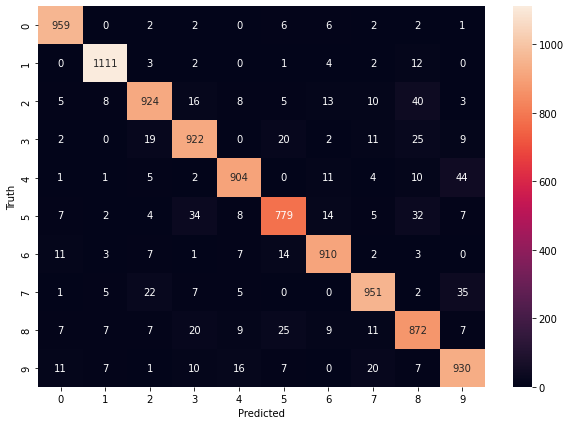

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

PART 2 - Adding a hidden layer

In [50]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2707 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1228 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0862 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0645 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0514 - accuracy: 0.9841


Evaluate the accuracy on test set

In [52]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0875 - accuracy: 0.9750


[0.08749447017908096, 0.9750000238418579]

Using confusion matrix for validation

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

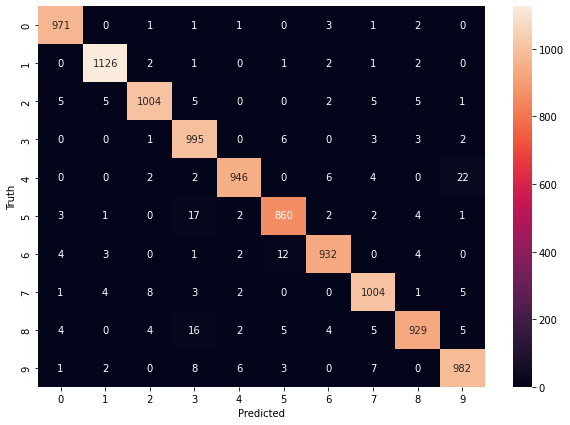

In [53]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Bonus Content
flattening out data each time is really tedious, don't worry keras got you covered. Just use the keras.layers.Flatten like the example below

In [54]:
# Example 1: VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [57]:


def f1_score(y_true, y_pred):
    """Computes the F1 score"""
    true_positives = tf.math.count_nonzero(y_pred * y_true, dtype=tf.float32)
    false_positives = tf.math.count_nonzero(y_pred * (y_true - 1), dtype=tf.float32)
    false_negatives = tf.math.count_nonzero((y_pred - 1) * y_true, dtype=tf.float32)
    
    precision = true_positives / (true_positives + false_positives + 1e-8)
    recall = true_positives / (true_positives + false_negatives + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)
    
    return f1, precision, recall


In [58]:
y_true = tf.constant([1, 0, 1, 0])
y_pred = tf.constant([1, 1, 0, 1])

f1, precision, recall = f1_score(y_true, y_pred)

print("F1 score:", f1.numpy())
print("Precision:", precision.numpy())
print("Recall:", recall.numpy())


F1 score: 0.4
Precision: 0.33333334
Recall: 0.5


In [59]:

from sklearn.metrics import classification_report

# Generate some example labels and predictions
y_true = np.array([0, 1, 1, 0, 1])
y_pred = np.array([1, 1, 0, 0, 1])

# Compute F1 score, precision, and recall
f1, precision, recall = f1_score(y_true, y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=["class 0", "class 1"])

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print(report)


F1 score: tf.Tensor(0.6666667, shape=(), dtype=float32)
Precision: tf.Tensor(0.6666667, shape=(), dtype=float32)
Recall: tf.Tensor(0.6666667, shape=(), dtype=float32)
              precision    recall  f1-score   support

     class 0       0.50      0.50      0.50         2
     class 1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

